## FakePersonality 

A tool to classify Twitter users, vulnerable to misinformation, based on their [_Personality Traits_](https://www.simplypsychology.org/big-five-personality.html) and [_Basic Human Values_](https://i2s.anu.edu.au/resources/schwartz-theory-basic-values).

Scores are measured using Natural Language Processing approaches on the basis of our previous research: [1](https://dl.acm.org/doi/10.1145/3341105.3373954) and [2](https://www.mdpi.com/2078-2489/11/4/179).

[Dataset paper](https://arxiv.org/pdf/2006.00885.pdf)
[Dataset Repo](https://github.com/cuilimeng/CoAID)
_This code is written in python >3.7*._

In [1]:
import pandas as pd
claim_fake_tweets_df = pd.read_csv("../CoAID/ClaimFakeCOVID-19_tweets.csv")
claim_fake_tweets_df.head()

,index,tweet_id
0,100001,1252630938770649089
1,100001,1243968198111789058
2,100001,1242474839966765056
3,100001,1242461115616866304
4,100001,1242400142335983619


In [2]:
claim_fake_tweets_df.shape

(457, 2)

In [3]:
claim_fake_replies_df = pd.read_csv("../CoAID/ClaimFakeCOVID-19_tweets_replies.csv")
claim_fake_replies_df.head()

,news_id,tweet_id,reply_id
0,100001,1242474839966765056,1242474835512446976
1,100001,1242474839966765056,1242474843137703938
2,100001,1242400142335983619,1242388627943878657
3,100001,1242400142335983619,1242400453700096001
4,100003,1248606541793488896,1248609022841729028


In [4]:
claim_fake_replies_df.shape

(623, 3)

In [5]:
claim_df = pd.read_csv("../CoAID/ClaimFakeCOVID-19.csv")
claim_df.head()

,Unnamed: 0,fact_check_url,news_url,title
0,100000,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Spraying chlorine or alcohol on the skin kill..."
1,100001,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Only older adults and young people are at risk"""
2,100002,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Children cannot get COVID-19"""
3,100003,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""COVID-19 is just like the flu"""
4,100004,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Everyone with COVID-19 dies"""


In the collection of claims, the first column is the misleading named news_id, instead it should be named claim_id. In fact as you can see by the numbering, it starts from 100000.

In [6]:
news_df = pd.read_csv("../CoAID/NewsFakeCOVID-19.csv")
news_df.head()

,Unnamed: 0,type,fact_check_url,archieve,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,NaN,NaN,NaN,NaN,Facebook posts shared in at least three countr...,NaN,NaN,NaN,NaN,NaN
1,1,article,https://www.politifact.com/factchecks/2020/apr...,NaN,http://legis.wisconsin.gov/assembly/republican...,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,NaN,NaN,""""""
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,NaN,NaN,NaN,NaN,Facebook posts claim a child who is infected w...,NaN,NaN,NaN,NaN,NaN
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/kokernagnews/photos/a...,NaN,NaN,NaN,NaN,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,NaN,NaN,NaN,NaN
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/photo.php?fbid=102193...,NaN,NaN,NaN,NaN,"42 Democratic senators, plus two Independents,...",NaN,NaN,NaN,NaN,NaN


In [7]:
news_fake_tweets_df = pd.read_csv("../CoAID/NewsFakeCOVID-19_tweets.csv")
news_fake_tweets_df.head()

,index,tweet_id
0,55,1255263076087185413
1,55,1254390256461365248
2,55,1253279600119033856
3,55,1252271897850544131
4,55,1251308087467802624


In [8]:
news_fake_replies_df = pd.read_csv("../CoAID/NewsFakeCOVID-19_tweets_replies.csv")
news_fake_replies_df.head()

,news_id,tweet_id,reply_id
0,17,1255484783884369921,1254913226325872642
1,17,1255484783884369921,1254985211265159169
2,17,1255484783884369921,1255484999203258370
3,26,1249534887691984897,1249535327829712898
4,26,1249534887691984897,1249536037489184769


As said before, the first column is named _news_id_ also here but the numbering is in the unit range instead of the thousands, so here the name is unique and not misleading.

<img src="./images/Source_fake.png" alt="Source Fake" width="300" height="400">
<img src="./images/Tweets_fake.png" alt="Tweets Fake" width="300" height="400">
<img src="./images/Replies_fake.png" alt="Replies Fake" width="300" height="400">

As shown in figure, the dataset is really unbalanced in the number of Claim with respect to the News. Till now the focus is on the fake side of the dataset. The number of both not fake news and claims is much higher.

**Claim** is a statement originate from a user, so he is described as the **source** of the sentence.

**News** is a link to an already published news the user is sharing without being the author, in this sense he acts as a spreader of the news acting like an **intermediate**.

In [9]:
claim_fake_tweets_df.groupby(['index']).size()

index
100001      6
100002      1
100003    363
100004     14
100005     12
100007     15
100008      2
100010      1
100011     10
100012     10
100013      3
100014      3
100015      3
100016      2
100018      2
100019      3
100022      5
100023      2
dtype: int64

In [10]:
claim_fake_replies_df.groupby(['news_id', 'tweet_id']).size()

news_id  tweet_id           
100001   1242400142335983619     2
         1242474839966765056     2
100003   1232831704345251840     2
         1233758272718622721     4
         1233880402344828928     9
                                ..
100013   1242958703436824576    10
100015   1236627986717323264     6
100019   1236627989036781569     6
100022   1240247344131493888     4
         1251517138126270465     3
Length: 131, dtype: int64

In [11]:
claim_fake_replies_df.groupby(['news_id']).size()

news_id
100001      4
100003    501
100004     21
100005     16
100007     25
100008     10
100011      3
100012     14
100013     10
100015      6
100019      6
100022      7
dtype: int64

In [12]:
news_fake_tweets_df.groupby(['index']).size()

index
1        1
17       5
26     248
38      34
46     500
      ... 
590    142
593    367
602     96
606    391
610     15
Length: 72, dtype: int64

In [13]:
news_fake_replies_df.groupby(['news_id', 'tweet_id']).size()

news_id  tweet_id           
17       1255484783884369921     3
26       1247608259042783234     1
         1247608761428185094     1
         1247618373883740162     1
         1247680031423254529     1
                                ..
606      1255269152534736896     1
         1255520293961060354    13
610      1227078286628380677     1
         1229077661038735360     1
         1250988725443743745     8
Length: 1266, dtype: int64

In [14]:
news_fake_replies_df.groupby(['news_id']).size()

news_id
17       3
26      23
38      30
46     286
51     100
55      60
65       1
67      21
68      13
73       4
84      83
115    318
124      4
199     13
200    244
201     32
203     76
206    521
253     45
263      6
297    413
307     10
310      9
327      1
366    166
374    399
404     23
406     11
417      4
418     75
443     15
466     75
483    110
485      1
496    944
508     21
517    266
528     36
536     16
545      2
548     48
556     71
558    131
561    165
562      3
565     34
570      8
577     54
587    364
590     68
593    168
602     10
606    107
610     10
dtype: int64

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


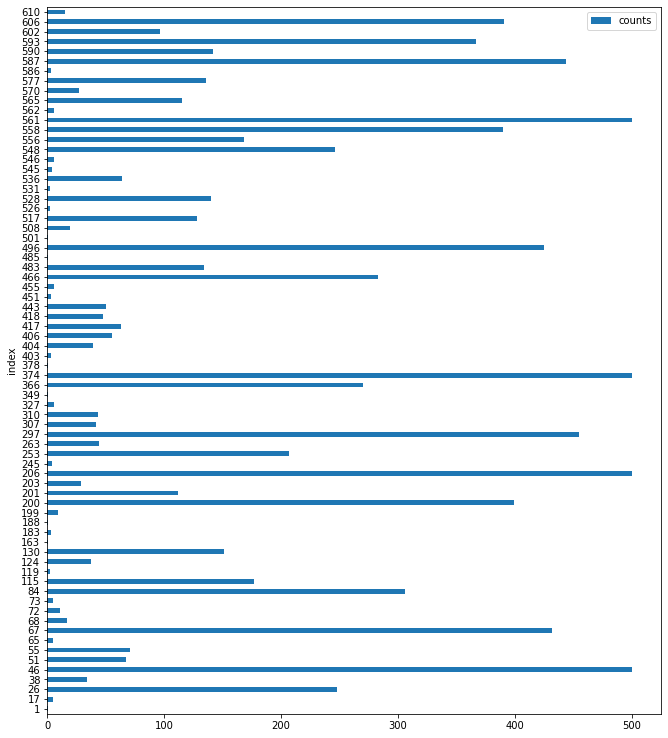

In [28]:
import matplotlib
news_plot_df = news_fake_tweets_df.groupby(['index']).size().reset_index(name='counts')
#news_plot_df.head()
news_plot_df.plot.barh(x='index', y='counts', rot=0, figsize=(11,13))